### About 'The Bank' (Masked)

- 'The Bank' is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

- 'The Bank' deploys formal credit to salaried individuals and businesses 4 main financial instruments:

    - Personal Loan
    - EMI Free Loan
    - Personal Overdraft
    - Advance Salary Loan

- The data science team at 'The Bank' is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

- This case study will focus on the underwriting process behind Personal Loan only

### Problem Statement

- Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and reading the dataset
df = pd.read_csv("the_bank.csv")
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


### Basic data exploration

In [3]:
# Structure of data
df.shape

(396030, 27)

In [4]:
# Columns in data
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [5]:
# Characteristics of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
# Unique attributes for each column
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [7]:
# Statistical information for data
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [8]:
# Check for missing values in data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [9]:
# Validating duplicated data
df.duplicated().sum()

0

### Observation

- The data contains 396,030 rows and 27 columns.

- The 'loan_amnt', 'int_rate, 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', and 'pub_rec_bankruptcies' columns have numerical data.

- The 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'initial_list_status', and 'application_type' columns have categorical data.

- The 'loan_status' column seems to be the target variable, as it contains information about the status of the loan.

- The 'emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', and 'pub_rec_bankruptcies' columns have missing values, which need to be addressed before performing any analysis or modeling.

- The data does not contain any duplicated rows.

### Data Pre-processing

In [10]:
# Handling missing values
df['emp_title'].fillna('Unknown', inplace=True)
df['emp_length'].fillna('Unknown', inplace=True)
df['title'].fillna('Unknown', inplace=True)
df['revol_util'].fillna(df['revol_util'].mean(), inplace=True)
df['mort_acc'].fillna(0, inplace=True)
df['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [11]:
# Verify that there are no more missing values
print(df.isnull().sum())

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64


In [12]:
# Preprocess the "term" column into numeric
df['term'] = df['term'].str.extract('(\d+)').astype(float)

### Outlier detection using boxplots

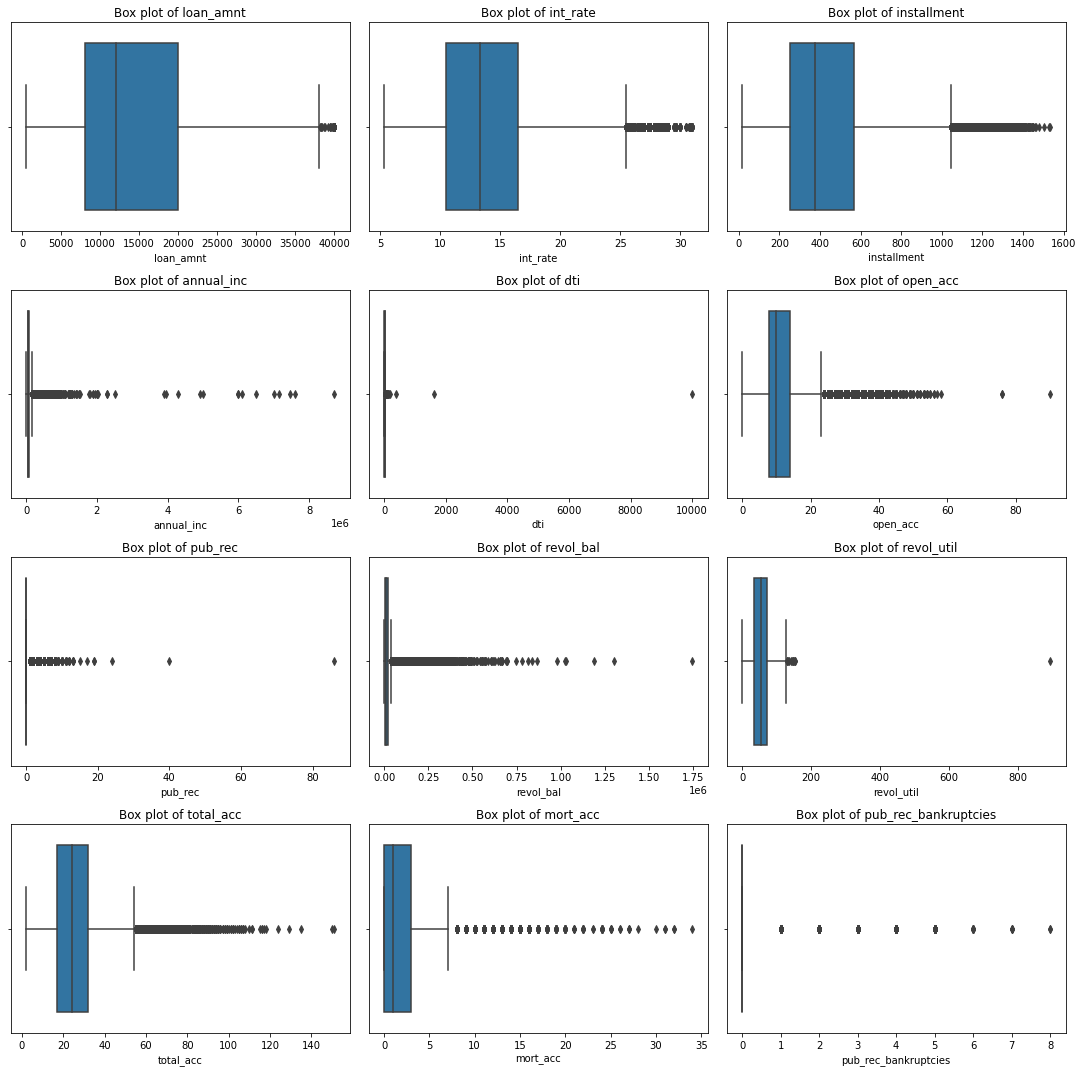

In [13]:
# Specify the numerical columns to check for outliers
num_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
               'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

# Create subplots for each numerical column
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [14]:
# Outliers treatment using z-score method
for col in num_columns:
    mean=df[col].mean()
    std=df[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

In [15]:
# Structure of the data after outliers removal
df.shape

(361389, 27)

### Observation

- Outliers in the numerical columns were detected using box plots and removed using the z-score method.
- The z-score method identifies data points that are more than 3 standard deviations away from the mean as outliers.
- After outlier removal, the dataset was reduced to 361,389 rows.

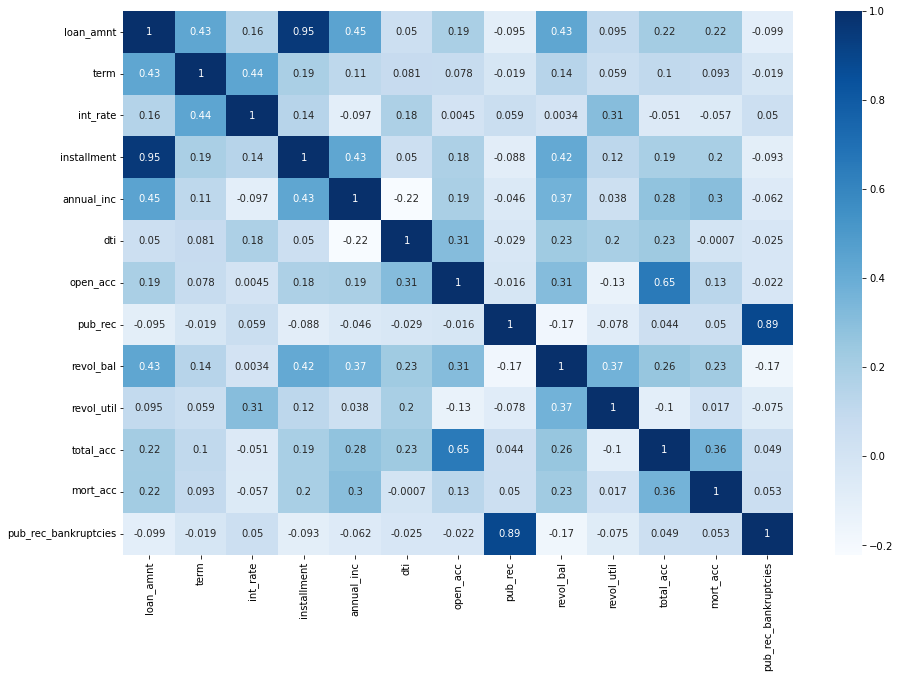

In [16]:
# Co-relation of data using heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="Blues")
plt.show()

### Observation

- 'loan amnt' and 'installment' are highly corelated with each other.
- 'pub_rec' and 'pub_rec_bankruptcies' are highly corelated with each other.
- 'total_acc' and 'open_acc' are corelated with each other.

### Exploratory Data Analysis

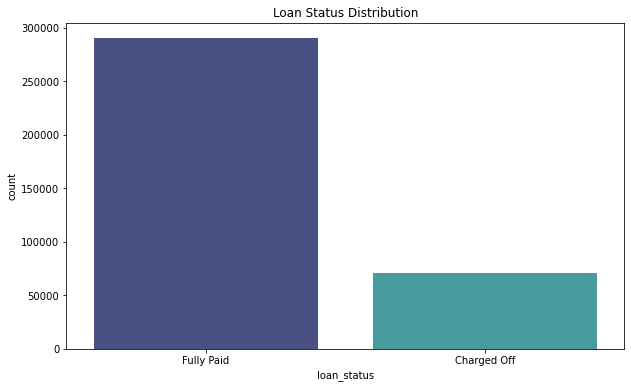

In [17]:
# Plot for distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df, palette='mako')
plt.title('Loan Status Distribution')
plt.show()

In [18]:
# Analyze the distribution of the target variable

loan_status_counts = df['loan_status'].value_counts()
total_count = len(df['loan_status'])
percentages = (loan_status_counts / total_count) * 100

print("Value counts and percentages for 'loan_status':\n")
for value, count, percentage in zip(loan_status_counts.index, loan_status_counts.values, percentages.values):
    print(value, ":", count, "(", round(percentage, 2), "%)")

Value counts and percentages for 'loan_status':

Fully Paid : 290397 ( 80.36 %)
Charged Off : 70992 ( 19.64 %)


### Observation

- The target variable 'loan_status' has an imbalanced distribution, with a majority of loans being fully paid and a smaller proportion being charged off.
- The countplot visualization confirms the imbalanced distribution, with a higher bar for 'Fully Paid' compared to 'Charged Off'.

### Univariate analysis

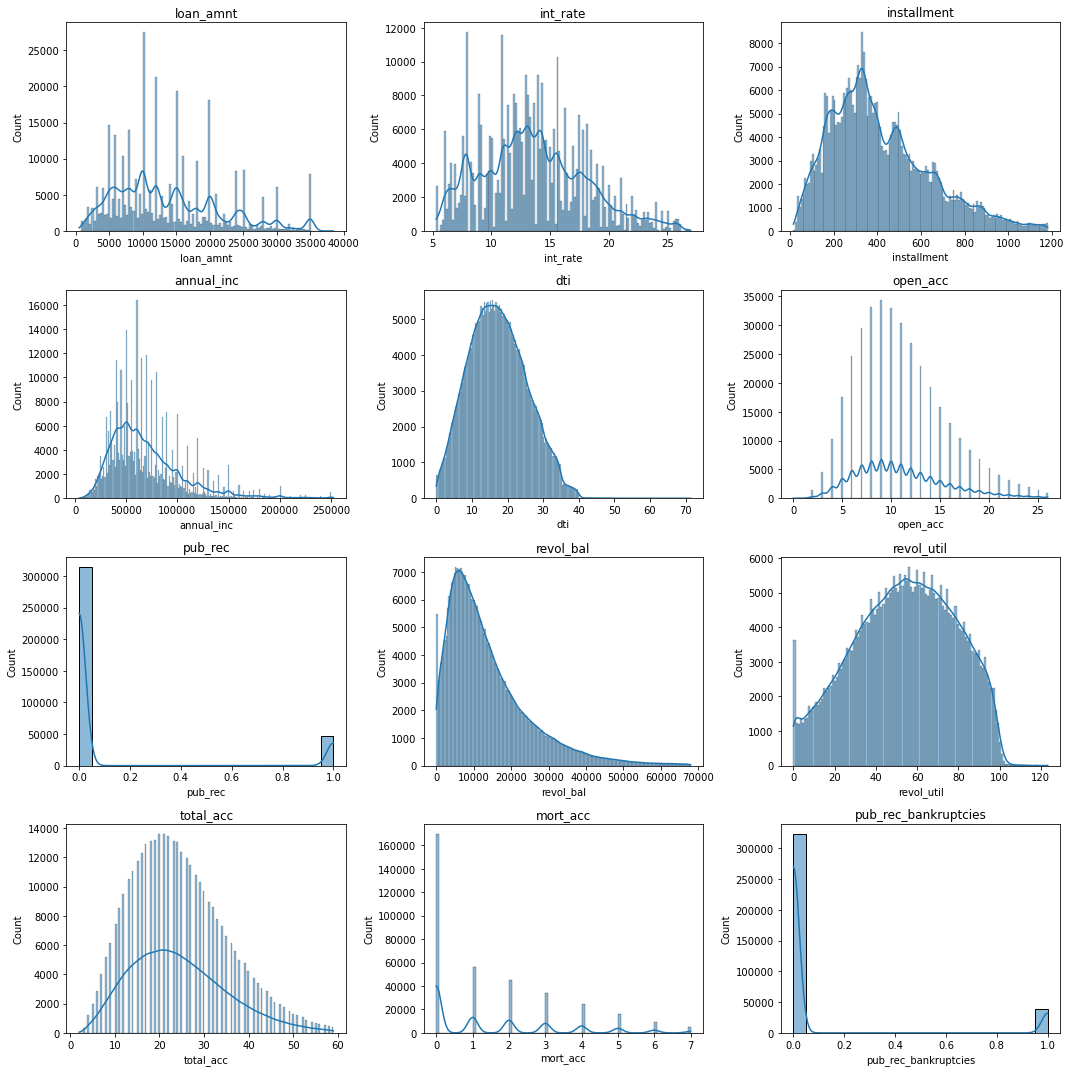

In [19]:
# For each numerical columns

# Create a figure and subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

# Iterate over the numerical columns and create hist plots
for i, column in enumerate(num_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Observation

- The 'loan_amnt' and 'installment' columns have peaks around lower values, indicating that smaller loan amounts and installment payments are more common.
- The 'int_rate' column follows a roughly normal distribution, with a peak around 10-15% interest rates.
- The 'annual_inc' column is right-skewed, suggesting that a majority of borrowers have lower annual incomes.
- The 'dti' column shows a distribution skewed towards the lower range, indicating that many borrowers have a lower debt-to-income ratio.
- The 'open_acc' and 'total_acc' columns exhibit right-skewness, suggesting that most borrowers have a relatively lower number of open and total accounts.
- The 'revol_bal' column is right-skewed, indicating that most borrowers have lower revolving balances.
- The 'revol_util' column follows a roughly normal distribution, with a peak around 60% credit utilization rate.
- The 'mort_acc' and "pub_rec_bankruptcies" columns exhibit right-skewness, suggesting that most borrowers have a lower number of mortgage accounts and public record bankruptcies.


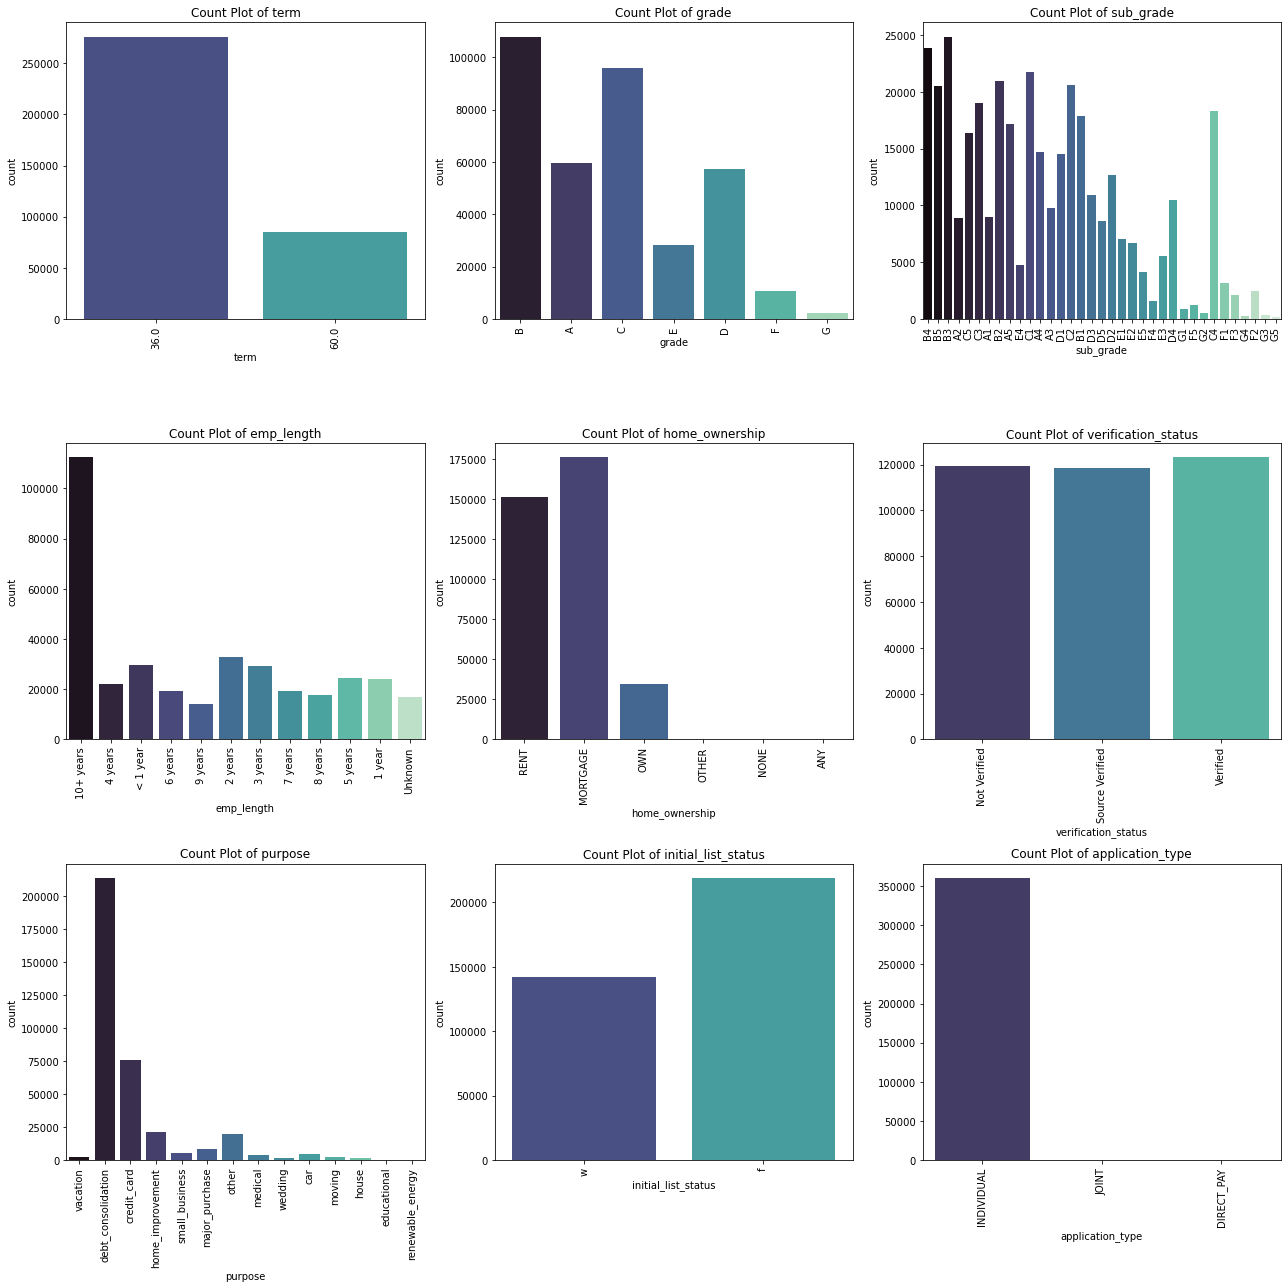

In [20]:
# For each categorical columns
cat_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose',
               'initial_list_status', 'application_type']

# Calculate the number of rows and columns needed for subplots
num_rows = 3
num_cols = 3
num_plots = num_rows * num_cols

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Flatten the axes array to easily iterate over the subplots
axes = axes.flatten()

# Iterate over the categorical columns and create count plots
for i, column in enumerate(cat_columns):
    ax = axes[i]  # Select the current subplot
    sns.countplot(x=column, data=df, palette = 'mako', ax=ax)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


In [21]:
# Calculate value counts and percentages for each column
col = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type']
for column in col:
    value_counts = df[column].value_counts()
    total_count = len(df[column])
    percentages = (value_counts / total_count) * 100
    
    print("Value counts and percentages for variable", column, ":\n")
    for value, count, percentage in zip(value_counts.index, value_counts.values, percentages.values):
        print(value, ":", count, "(", round(percentage, 2), "%)")
    print()

Value counts and percentages for variable term :

36.0 : 276254 ( 76.44 %)
60.0 : 85135 ( 23.56 %)

Value counts and percentages for variable grade :

B : 107943 ( 29.87 %)
C : 96047 ( 26.58 %)
A : 59396 ( 16.44 %)
D : 57194 ( 15.83 %)
E : 28176 ( 7.8 %)
F : 10528 ( 2.91 %)
G : 2105 ( 0.58 %)

Value counts and percentages for variable sub_grade :

B3 : 24863 ( 6.88 %)
B4 : 23849 ( 6.6 %)
C1 : 21760 ( 6.02 %)
B2 : 20933 ( 5.79 %)
C2 : 20616 ( 5.7 %)
B5 : 20478 ( 5.67 %)
C3 : 19043 ( 5.27 %)
C4 : 18260 ( 5.05 %)
B1 : 17820 ( 4.93 %)
A5 : 17171 ( 4.75 %)
C5 : 16368 ( 4.53 %)
A4 : 14656 ( 4.06 %)
D1 : 14483 ( 4.01 %)
D2 : 12664 ( 3.5 %)
D3 : 10941 ( 3.03 %)
D4 : 10460 ( 2.89 %)
A3 : 9762 ( 2.7 %)
A1 : 8944 ( 2.47 %)
A2 : 8863 ( 2.45 %)
D5 : 8646 ( 2.39 %)
E1 : 7066 ( 1.96 %)
E2 : 6634 ( 1.84 %)
E3 : 5575 ( 1.54 %)
E4 : 4780 ( 1.32 %)
E5 : 4121 ( 1.14 %)
F1 : 3173 ( 0.88 %)
F2 : 2475 ( 0.68 %)
F3 : 2072 ( 0.57 %)
F4 : 1585 ( 0.44 %)
F5 : 1223 ( 0.34 %)
G1 : 849 ( 0.23 %)
G2 : 491 ( 0.14 %)


In [22]:
# The top 5 job titles of customers
top_job_titles = df['emp_title'].value_counts().head(5)
percentages = (df['emp_title'].value_counts() / len(df['emp_title'])) * 100

print("Top 5 job titles with counts and percentages:")
for title, count in top_job_titles.items():
    percentage = percentages[title]
    print(title, ":", count, "(", round(percentage, 2), "%)")
    

Top 5 job titles with counts and percentages:
Unknown : 20766 ( 5.75 %)
Teacher : 3995 ( 1.11 %)
Manager : 3814 ( 1.06 %)
Supervisor : 1687 ( 0.47 %)
Registered Nurse : 1660 ( 0.46 %)


### Observation

- The 'term' column shows that most loans have a term of 36 months, while a smaller proportion have a term of 60 months.

- The 'grade' column indicates that the majority of loans are assigned a grade of 'A' or 'B' or 'C', suggesting a relatively lower risk profile.

- The 'emp_length' column shows that most borrowers have been employed for 10 or more years, followed by shorter employment durations.

- The 'home_ownership' column reveals that the majority of borrowers either renting or are paying a mortgage, while a smaller proportion owns a home.

- The 'verification_status' column indicates that a significant number of loans have been verified, while a smaller proportion are not verified or have only been verified for certain aspects.

- The 'purpose' column shows that debt consolidation is the most common reason for borrowing, followed by credit card refinancing and home improvement.

- The 'initial_list_status' column suggests that most loans were initially listed as 'f', indicating fractional loans.

- The 'application_type' column reveals that the majority of loans are individual applications.

### Bivariate analysis

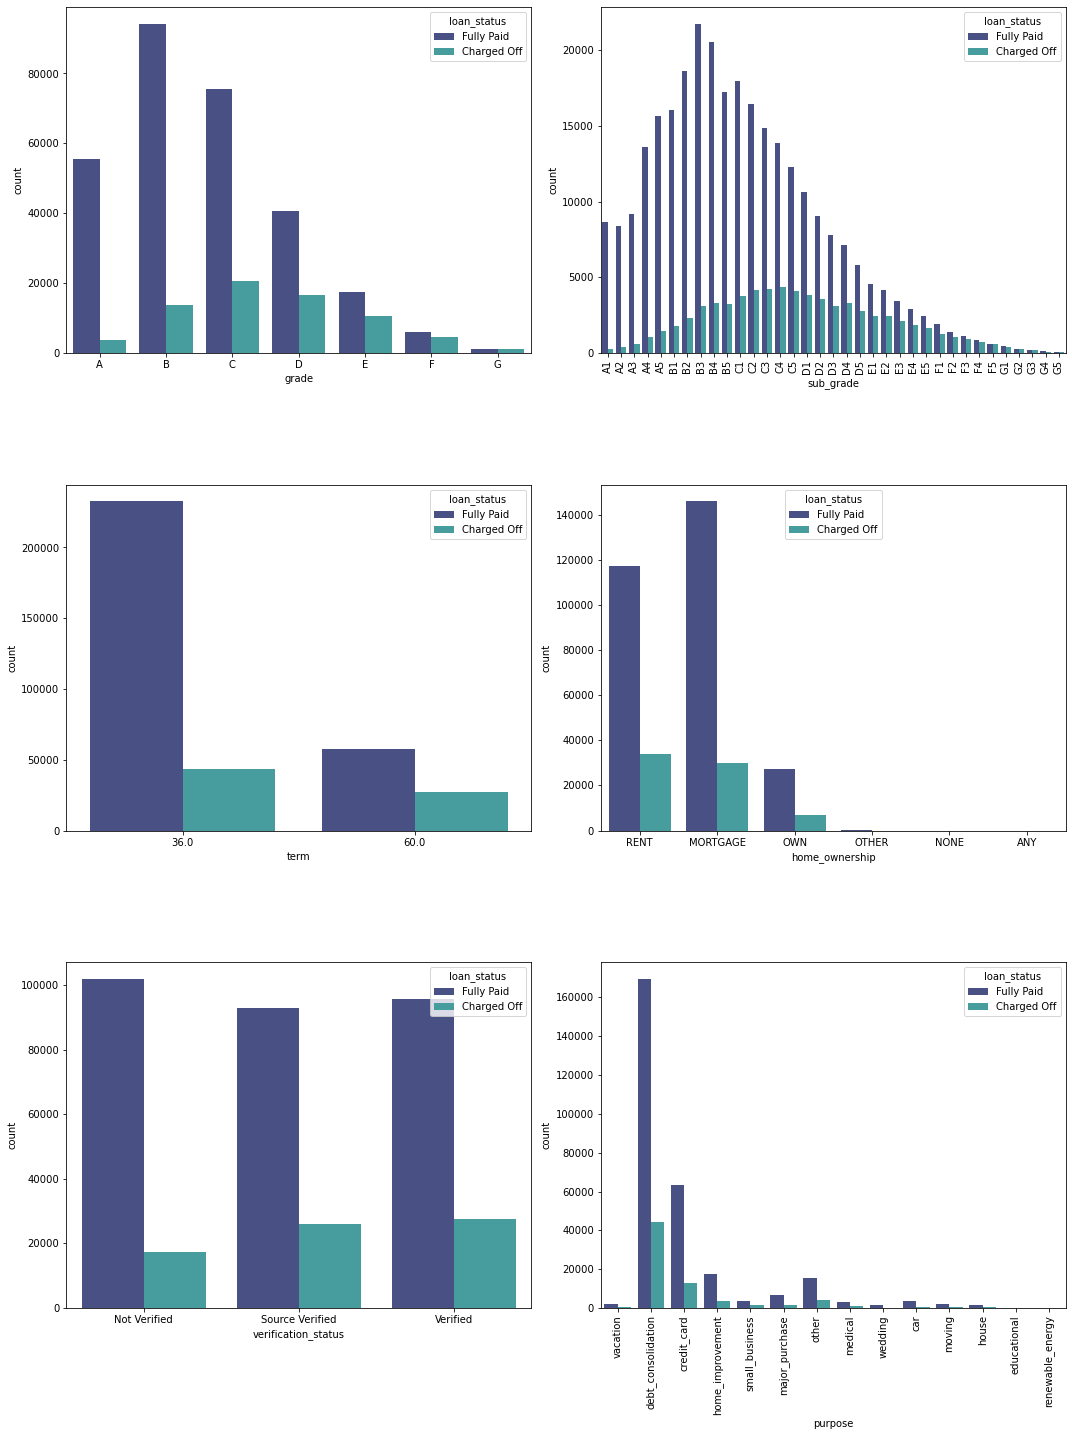

In [23]:
# Figure size
plt.figure(figsize=(15, 25))

# Create a 4x2 grid of subplots
grid_rows = 4
grid_cols = 2
num_plots = grid_rows * grid_cols

# Subplot 1
plt.subplot(grid_rows, grid_cols, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade, palette='mako')

# Subplot 2
plt.subplot(grid_rows, grid_cols, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade, palette='mako')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Subplot 3
plt.subplot(grid_rows, grid_cols, 3)
sns.countplot(x='term', data=df, hue='loan_status', palette='mako')

# Subplot 4
plt.subplot(grid_rows, grid_cols, 4)
sns.countplot(x='home_ownership', data=df, hue='loan_status', palette='mako')

# Subplot 5
plt.subplot(grid_rows, grid_cols, 5)
sns.countplot(x='verification_status', data=df, hue='loan_status', palette='mako')

# Subplot 6
plt.subplot(grid_rows, grid_cols, 6)
g = sns.countplot(x='purpose', data=df, hue='loan_status', palette='mako')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


### Observation

- Loans with lower grades and sub-grades (indicating higher risk) have a higher proportion of charged off loans.
- Loans with a term of 36 months have a slightly higher proportion of charged off loans compared to loans with a term of 60 months.
- Borrowers who own a home or have a mortgage have a lower proportion of charged off loans compared to renters.
- Verified loans have a lower proportion of charged off loans followed by loans that are not verified or verified for certain aspects.
- Loans for debt_consolidation and credit_cards have a higher proportion of charged off loans compared to other purposes.

### Feature engineering

In [24]:
# Dropping some columns which are not required
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade', 'address', 'earliest_cr_line', 'emp_length'], axis=1, inplace=True)

In [25]:
# Define columns to apply the condition
columns = ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies']

# Perform feature engineering to flag the columns
for column in columns:
    df[column] = df[column].apply(lambda x: 1 if x > 1.0 else 0)

In [26]:
# One-hot encoding to convert categorical variable to numerical
dummies=['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']
df = pd.get_dummies(df,columns=dummies,drop_first=True)

In [27]:
# Convert 'loan_status' column to 0s and 1s
df['loan_status'] = df['loan_status'].replace({'Fully Paid': 0, 'Charged Off': 1})

In [28]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36.0,11.44,329.48,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1,8000.0,36.0,11.99,265.68,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,15600.0,36.0,10.49,506.97,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7200.0,36.0,6.49,220.65,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,24375.0,60.0,17.27,609.33,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Building a model

In [29]:
# Separate the features (X) and the target variable (y)

X = df.drop("loan_status", axis=1) # Assuming other columns are features
y = df["loan_status"]

In [30]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.45345205, -0.5551365 , -0.48098148, ...,  1.24157994,
         0.04026635, -0.03140158],
       [-0.70714358, -0.5551365 , -0.35646885, ..., -0.80542539,
         0.04026635, -0.03140158],
       [ 0.25688423, -0.5551365 , -0.69604874, ..., -0.80542539,
         0.04026635, -0.03140158],
       ...,
       [-1.08768087, -0.5551365 , -0.80924204, ..., -0.80542539,
         0.04026635, -0.03140158],
       [ 0.94185136,  1.80135877,  0.39513464, ..., -0.80542539,
         0.04026635, -0.03140158],
       [-1.46821817, -0.5551365 ,  0.01027743, ..., -0.80542539,
         0.04026635, -0.03140158]])

In [31]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)

(289111, 42)
(72278, 42)


In [33]:
# Create and train the logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Create a DataFrame to store the coefficients and corresponding column names
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# Print the coefficients with column names
print(coefficients)

                                Feature  Coefficient
0                             loan_amnt    -0.083466
1                                  term     0.238748
2                              int_rate     0.015095
3                           installment     0.176066
4                            annual_inc    -0.189650
5                                   dti     0.198765
6                              open_acc     0.119207
7                               pub_rec     0.000000
8                             revol_bal    -0.065968
9                            revol_util     0.083745
10                            total_acc    -0.096545
11                             mort_acc    -0.019657
12                 pub_rec_bankruptcies     0.000000
13                              grade_B     0.240751
14                              grade_C     0.432209
15                              grade_D     0.454831
16                              grade_E     0.386047
17                              grade_F     0.

In [35]:
# Predict on the test set
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

# Classification report
print('Classification Report :')
print(classification_report(y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     58032
           1       0.55      0.06      0.10     14246

    accuracy                           0.81     72278
   macro avg       0.68      0.52      0.50     72278
weighted avg       0.76      0.81      0.74     72278



ROC AUC: 0.7065485197456594


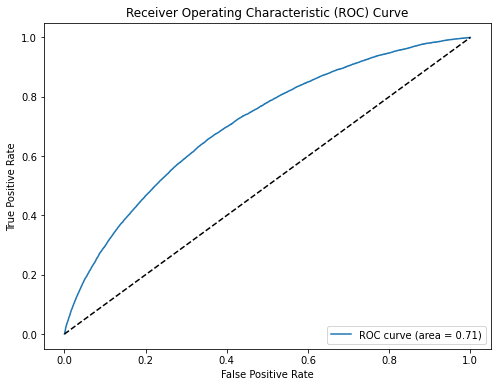

In [37]:
# Compute probabilities for ROC curve and AUC score
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print('ROC AUC:', roc_auc)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

PR_AUC: 0.36983713827417475


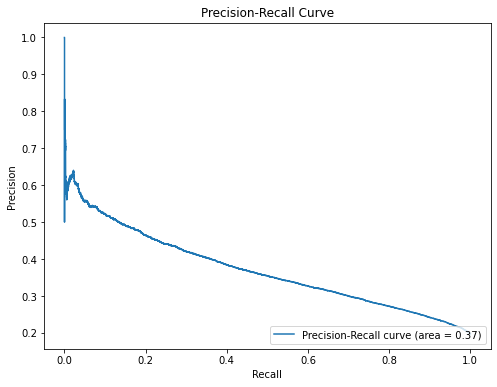

In [38]:
# Precision-recall curve
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print('PR_AUC:', pr_auc)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix

# Extract confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion)

Confusion Matrix: [[57377   655]
 [13431   815]]


### Observation 

- The model has a high accuracy in predicting the fully paid loans (class "0") due to a high precision and recall for this class.
- However, the model performs poorly in predicting the charged off loans (class "1"), with low precision, recall, and F1-score for this class.
- The imbalanced distribution of the target variable (majority fully paid loans, minority charged off loans) is likely impacting the model's performance, particularly in predicting the charged off loans.
- The ROC AUC score indicates some level of discrimination ability, but the PR AUC score suggests that the precision and recall trade-off is not well-balanced.
- The curve shows that as the recall increases, the precision decreases. This trade-off is expected, as increasing the recall involves identifying more true positives.

### After balancing the class

In [40]:
# Apply SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print(y_resampled.value_counts())

0    290397
1    290397
Name: loan_status, dtype: int64


In [41]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Classification report
print('Classification Report :')
print(classification_report(y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.63      0.65     58218
           1       0.64      0.67      0.66     57941

    accuracy                           0.65    116159
   macro avg       0.65      0.65      0.65    116159
weighted avg       0.65      0.65      0.65    116159



ROC AUC: 0.6997086238772071


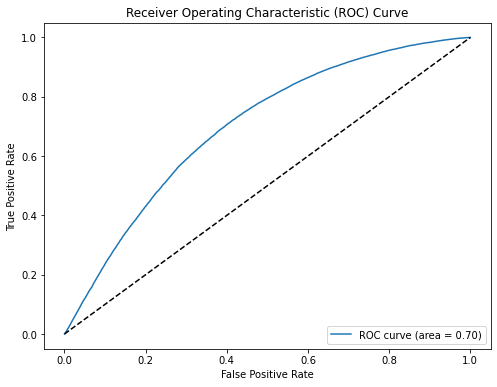

In [42]:
# Compute probabilities for ROC curve and AUC score
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print('ROC AUC:', roc_auc)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

PR_AUC: 0.6545684990759488


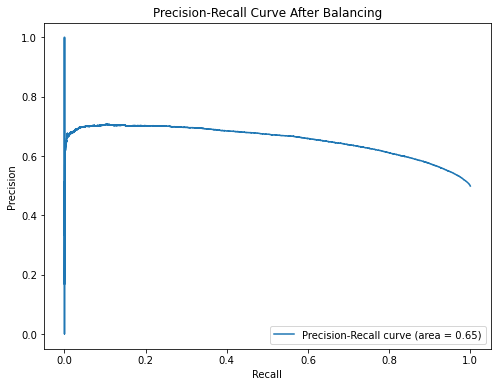

In [43]:
# Precision-recall curve after balancing
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
print('PR_AUC:', pr_auc)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve After Balancing')
plt.legend(loc="lower right")
plt.show()

In [44]:
# Extract confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion)

Confusion Matrix: [[36847 21371]
 [19171 38770]]


### Observation

- The updated results show that the model performs consistently after balancing the data, with similar precision, recall, and F1-score for both classes.
- The precision-recall curve confirms the balanced performance, indicating that the model can achieve reasonable precision even at higher recall levels.
- Overall, the model performs reasonably well after balancing the data, providing a balanced trade-off between precision and recall for both positive and negative classes.

### Tradeoff questions


- How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.


    - To ensure that the model can detect real defaulters while minimizing false positives:

        - Select relevant features that have a significant impact on default prediction.
        - Address class imbalance between default and non-default classes using oversampling or undersampling techniques.
        - Adjust the classification threshold to favor either precision or recall, depending on your priorities.
        - Evaluate the model's performance using appropriate metrics like F1-score or area under the Precision-Recall curve.
        - Consider ensemble learning techniques to combine multiple models for improved predictions.
        - Apply regularization techniques to prevent overfitting and improve generalization.
        - Seek guidance from domain experts to capture important factors contributing to defaults.
        - Continuously monitor the model's performance, gather real-world feedback, and update it using new data for improved accuracy. 

- Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.


    - To mitigate the risk of non-performing assets (NPA) and ensure prudence in loan disbursement:

        - Implement stringent risk assessment criteria to evaluate the creditworthiness of borrowers.
        - Conduct thorough background checks, including employment verification, income verification, and credit history analysis.
        - Set conservative loan approval thresholds and adhere to strict eligibility criteria.
        - Prioritize collateral-based loans or secured lending to minimize the risk of default.
        - Implement a comprehensive and robust underwriting process to accurately assess the repayment capacity of borrowers.
        - Regularly review and update risk models and algorithms to incorporate changing market dynamics and risk factors.
        - Continuously monitor loan portfolios for early warning signs of potential defaults and take proactive measures.
        - Establish strong risk management and collection strategies to minimize losses in case of default.
        - Provide comprehensive training to loan officers and staff to enhance their understanding of risk management and NPA prevention.
        - Foster a culture of responsible lending and emphasize the importance of minimizing NPAs across the organization.
        - By implementing these measures, you can enhance risk management practices and minimize the chances of disbursing loans to individuals with a higher risk of default, thereby reducing the impact of NPAs on your lending business.

### Insights from the analysis

- Most loans in the dataset are fully paid, indicating a high repayment rate.
- Loan amounts and installments are generally smaller.
- Lower grades and sub-grades suggest higher risk and a higher proportion of charged off loans.
- Verified loans and home ownership (owning a home or having a mortgage) have a lower proportion of charged off loans.
- The model's performance in predicting charged off loans needs improvement, with low precision, recall, and F1-score.

### Recommendations for problem statement

- To determine if a credit line should be extended and recommend repayment terms:

    - Consider the purpose of the credit and evaluate any potential risks.
    - Grant the credit line to individuals with good credit, stable income, and a low debt-to-income ratio.
    - Determine the appropriate loan amount based on their financial profile.
    - Set an interest rate that reflects their credit risk and market conditions.
    - Establish a repayment schedule that aligns with their income and cash flow.
    - Monitor their repayment behavior and periodically review their financial circumstances.
    - Tailor the terms and conditions to their specific financial situation and adhere to regulatory requirements.